In [1]:
# decision tree

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

housing5 = pd.read_csv('~/Documents/datacamp/WBS-School/wbs-housing-iter-0-2/housing-classification-iter-0-2.csv')

housing_df = housing5.copy()


In [3]:
# housing_df.info()

In [4]:
X = housing_df.copy()


In [5]:
# target
y = X.pop("Expensive")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)



In [7]:
# X_train.columns.values

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()


In [9]:
# imp = SimpleImputer().set_output(transform='pandas')

In [10]:
# imp.fit(X)
# x_imp = imp.transform(X)
# new_df = pd.DataFrame(x_imp, columns=X.columns, index=X.index)

# print(new_df.isnull().sum())
# print(new_df.shape)

In [11]:
imp.fit(X_train)
X_imp_train = imp.transform(X_train)
df = X_train
new_df = pd.DataFrame(X_imp_train, columns=df.columns, index=df.index)

print(new_df.isnull().sum())
print(new_df.shape)

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64
(1168, 9)


In [12]:
# https://stackoverflow.com/questions/51293196/attributeerror-numpy-ndarray-object-has-no-attribute-drop
# df = X_train
# imp_df = StandardScaler().fit_transform(df)
# new_df = pd.DataFrame(imp_df, columns=df.columns, index=df.index)
# new_df.isnull().sum()


In [13]:
X_train.fillna(X_train.median(),inplace=True)
X_train.isnull().sum()


LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [14]:
# y_train.isnull().sum()


In [15]:
X_test.isnull().sum()


LotArea          0
LotFrontage     57
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
dtype: int64

In [16]:
# X_test.fillna(df.mean(),inplace=True) # score: 88
X_test.fillna(df.median(),inplace=True) # score: 
# X_test.dropna('LotFrontage',inplace=True) # bugs
# X_test = X_test[X_test['LotFrontage'].notna()] # bugs


In [17]:
print(X_train.shape)
print(y_train.shape)

(1168, 9)
(1168,)


In [18]:
from sklearn.tree import DecisionTreeRegressor


In [19]:

# model 1 : imputed train set
m = 7 # see k-fold
s = 0.1
r = 3
# model = DecisionTreeRegressor(max_depth=m,min_samples_leaf=s,random_state=r) #.50 accuracy
model = DecisionTreeRegressor()
model.fit(X_imp_train,y_train)

DecisionTreeRegressor()

In [20]:
y_pred = model.predict(X_test)

/Users/cytalladen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [21]:
# print(type(y_pred))
# print(y_test.shape)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_test, # y_train,
               y_pred = y_pred
              )

0.8664383561643836

In [23]:
# task:
# Tweak the parameters max_depth and min_samples_leaf of the decision tree, based on the Scikit-Learn documentation 
# Try to make the tree smaller.
# Visualize again the tree.
# Check the performance of your "small tree" on the train & test sets.
    


In [24]:
# https://medium.com/featurepreneur/decision-tree-regression-9170dc2f6a95
# https://github.com/ellen567/Data-Science-Notebook/wiki/18-01-Classification-And-Regression-Tree

In [25]:
from sklearn.metrics import mean_squared_error as MSE
# Compute mse_dt test set
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.37


[Text(0.6013829022988506, 0.9666666666666667, 'GarageCars <= 2.5\nsquared_error = 0.13\nsamples = 1168\nvalue = 0.153'),
 Text(0.3917025862068966, 0.9, 'TotalBsmtSF <= 1443.0\nsquared_error = 0.067\nsamples = 1019\nvalue = 0.073'),
 Text(0.17923850574712644, 0.8333333333333334, 'Fireplaces <= 0.5\nsquared_error = 0.035\nsamples = 898\nvalue = 0.037'),
 Text(0.05747126436781609, 0.7666666666666667, 'TotalBsmtSF <= 1304.0\nsquared_error = 0.006\nsamples = 491\nvalue = 0.006'),
 Text(0.022988505747126436, 0.7, 'LotFrontage <= 74.5\nsquared_error = 0.002\nsamples = 478\nvalue = 0.002'),
 Text(0.011494252873563218, 0.6333333333333333, 'squared_error = 0.0\nsamples = 378\nvalue = 0.0'),
 Text(0.034482758620689655, 0.6333333333333333, 'LotArea <= 8052.0\nsquared_error = 0.01\nsamples = 100\nvalue = 0.01'),
 Text(0.022988505747126436, 0.5666666666666667, 'LotArea <= 7933.0\nsquared_error = 0.071\nsamples = 13\nvalue = 0.077'),
 Text(0.011494252873563218, 0.5, 'squared_error = 0.0\nsamples = 12

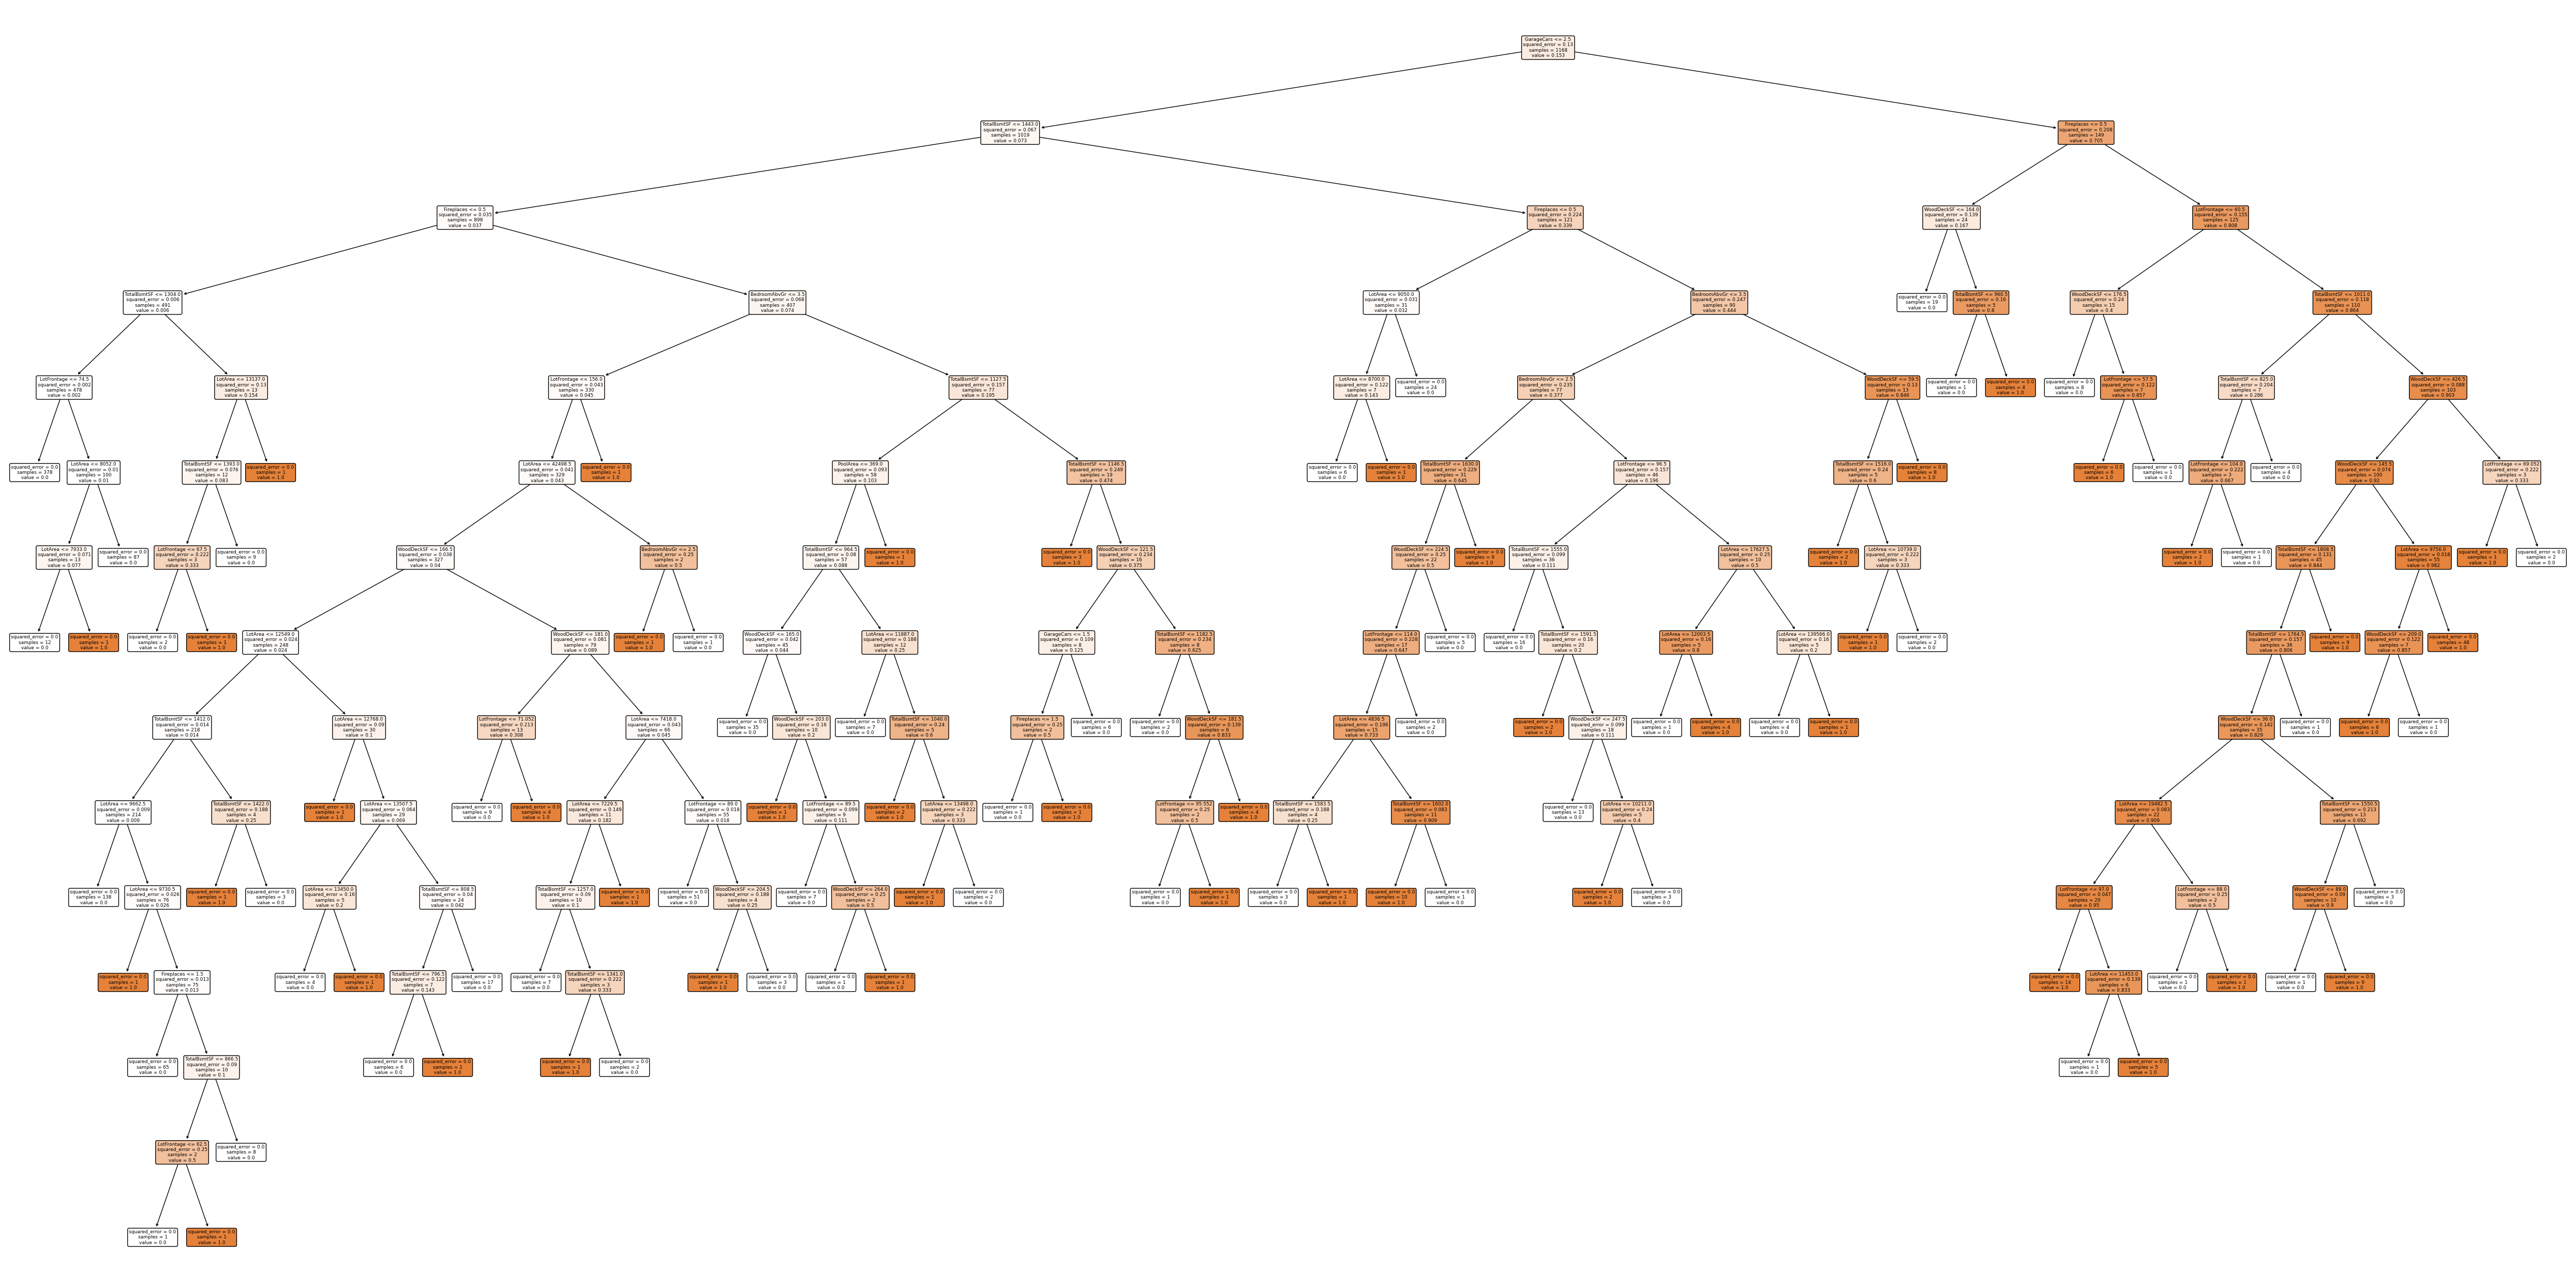

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))
plot_tree(model, filled=True, 
          rounded=True, 
          class_names=['Expensive','Not Expensive'],
          feature_names=X.columns
)
